In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import feature_extractor
import numpy as np
import os

In [2]:
myDB = db.connect_db("inference")
list_model = ["mobilenet_v1", "inception_v4", "resnet_v1_152"]

In [3]:
from __future__ import division
#import sys
import os
import csv
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
# Import datasets, classifiers and performance metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from math import ceil
import util
from threading import Thread
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
#-------------------------------
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB

In [4]:
import premodel
csv = 'Author' #choose either Author or Student
pm = premodel.Premodel(csv)

In [5]:
amount_images = 4999 #changes the number of input images
list_premodels = ([('log_reg', 'log_reg', 'log_reg')])
data, first_level_data, second_level_data, third_level_data = pm.cv_training_data(amount_images)
feature_list = ['n_of_keypoints', 'avg_perc_brightness', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length1', 'hue1']

In [6]:
print(data[0])
print(first_level_data[0])
print(second_level_data[0])
print(third_level_data[0])

['-0.368491268', '-0.367459119', '-0.368733307', '-0.368210647', '-0.368290613', '0.829527447', '-0.368161599']
('ILSVRC2012_val_00000001.JPEG', '1')
('ILSVRC2012_val_00000001.JPEG', '1')
('ILSVRC2012_val_00000001.JPEG', '1')


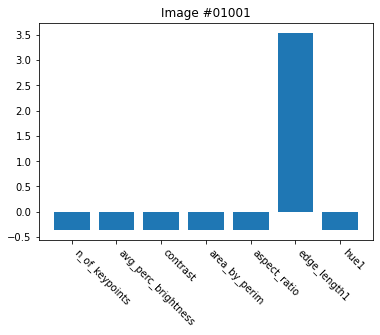

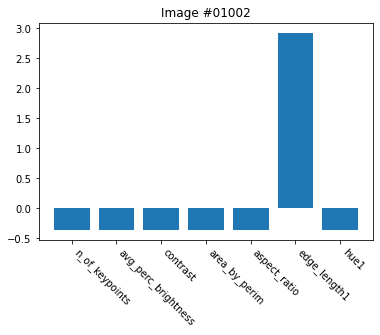

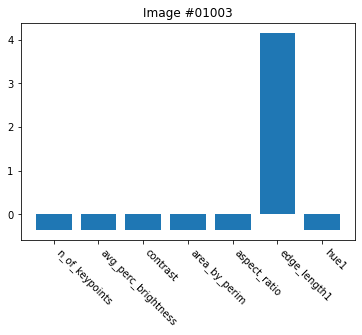

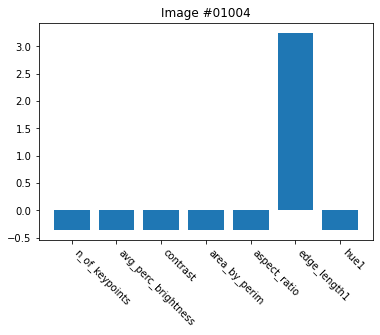

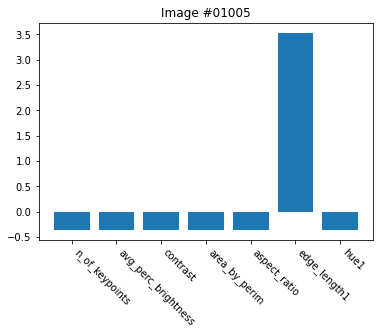

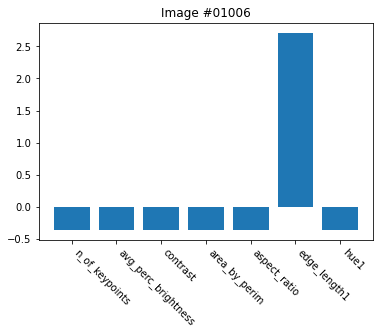

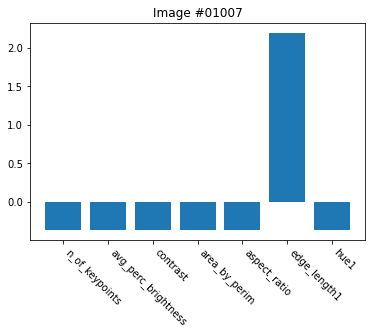

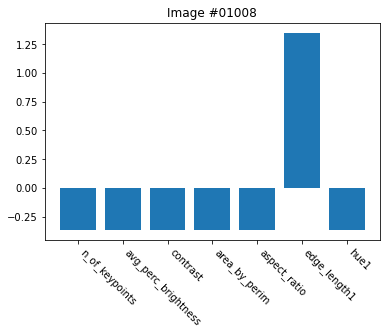

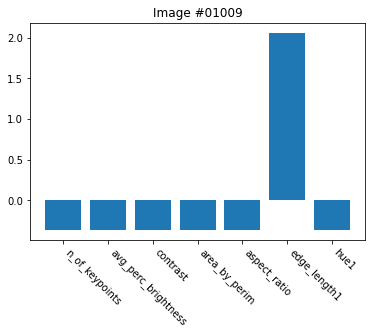

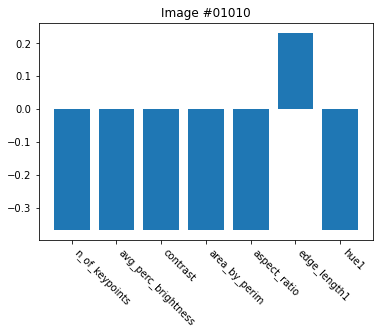

In [7]:
import matplotlib.pyplot as plt #Student's code
from sklearn import tree
for i in range(1000, 1010):
    for x in range(len(data[i])):
        data[i][x] = float(data[i][x])
    plt.title("Image #{}".format(first_level_data[i][0][-10:-5]))
    plt.bar(feature_list, data[i])
    plt.xticks(rotation=-45, ha='left')
    plt.show()

In [8]:
max = 0
min = 0
for x in range(len(data)):
    if max < float(data[x][5]):
        max = float(data[x][5])
    if min > float(data[x][5]):
        min = float(data[x][5])
print("Max value for edge length: {} ".format(max))
print("Min value for edge length: {} ".format(min))

Max value for edge length: 5.731095339 
Min value for edge length: -0.187473895 


In [9]:
print(data[1])

['-0.367699562', '-0.367600431', '-0.368054391', '-0.368202862', '-0.36825804', '1.603893952', '-0.368161599']


In [10]:
import statistics
floats = [list( map(float,i) ) for i in data]
temp = list(map(list, zip(*floats)))
print(temp[6])

[-0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161598, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161598, -0.368161599, -0.368161599, -0.368161599, -0.368161597, -0.368161599, -0.368161598, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161599, -0.368161598, -0.368161598, -0.368161599, -0.368161599, -0.368161599, -0.36

In [11]:
means = []
medians = []
for x in range(len(data[0])):
    means.append(statistics.mean(temp[x]))
    medians.append(statistics.median(temp[x]))
print("Mean of feature values is: {} ".format(means))
print("Median of feature values is: {} ".format(medians))

Mean of feature values is: [-0.3681595949473895, -0.368155256774955, -0.36815506015163035, -0.36815641463112625, -0.36815621952990596, 2.2209758121936387, -0.36816158678615724] 
Median of feature values is: [-0.36824307, -0.368143044, -0.368075587, -0.368210647, -0.368233256, 2.112566705, -0.368161599] 


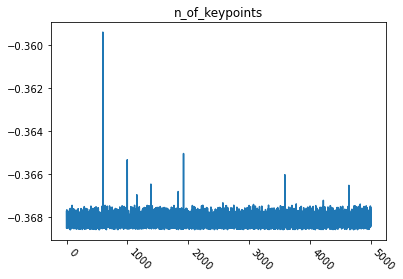

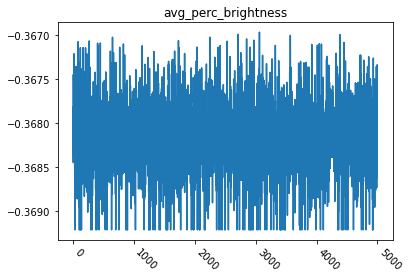

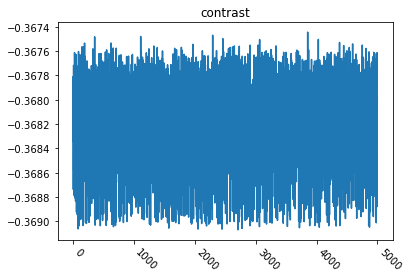

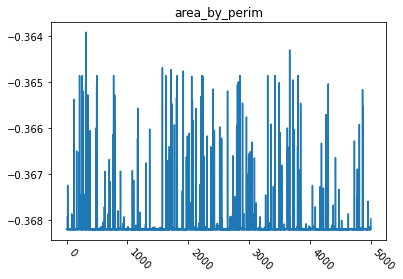

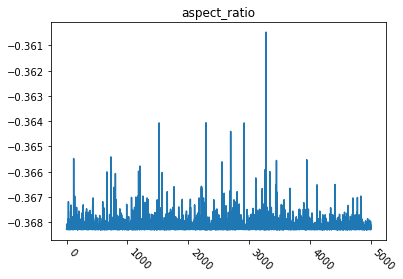

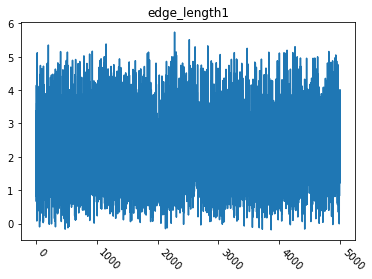

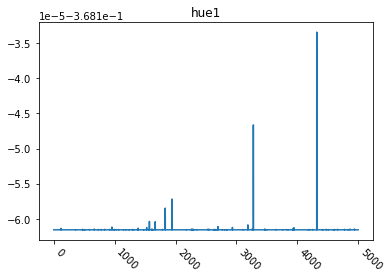

In [12]:

for i in range(len(data[0])):
    plt.title("{}".format(feature_list[i]))
    plt.plot(temp[i])
    plt.xticks(rotation=-45, ha='left')
    plt.show()

In [16]:
ones = 0
zeros = 0
o = []
z = []
for y in range(3):
    for x in range(len(first_level_data)):
        if first_level_data[x][1] == '0':
            zeros += 1
        elif first_level_data[x][1] == '1':
            ones += 1
    o.append(ones)
    z.append(zeros)
    ones = 0
    zeros = 0
print(o)
print(z)
    

[3533, 3533, 3533]
[1466, 1466, 1466]
